In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikeras

# Importing relevant libraries


In [3]:
import pandas as pd
import numpy as np
import sklearn
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
from sklearn import tree, metrics
from keras.models import Sequential
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import load_model
import joblib
import pickle

In [4]:
pip install pyyaml h5py

In [5]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Reading the data into a dataframe


In [6]:
customer_churn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

# Data Pre-processing

In [7]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churn = pd.DataFrame(customer_churn)

In [9]:
churn = churn.drop('customerID', axis = 1)

*Picking the target variable*

In [10]:
y = churn['Churn']
churn_answer = y

In [11]:
churn2 = churn
churn2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


*Dropping the target variable*

In [12]:
churn = churn.drop('Churn', axis = 1)
churn1 = churn

*Seperating the attributes into numerical and categorical*

In [13]:
values = ['TotalCharges','tenure', 'MonthlyCharges']
numerical = churn[values]
churn = churn.drop(numerical , axis =1)
categorical =  churn.select_dtypes(include=['object'])

In [14]:
churn = churn.drop(categorical, axis = 1)

*Encoding the independent variables*

In [15]:
label_encoder = LabelEncoder()

In [16]:
label_encoded = categorical.apply(lambda x: label_encoder.fit_transform(x))
categorical_values = pd.DataFrame(label_encoded)

In [17]:
label_encode = label_encoder.fit_transform(y)
y = pd.DataFrame(label_encode)

*Saving the label encoder for deployment*

In [18]:
np.save('classes.npy', label_encoder.classes_)

*Concatinating the encoded categorical variables with the numerical values*

In [19]:
churn =  pd.concat([churn,categorical_values], axis=1)
churn = pd.concat([churn, numerical], axis =1)
churn

,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,tenure,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,1,29.85
1,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1889.5,34,56.95
2,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,108.15,2,53.85
3,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,45,42.30
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,151.65,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.5,24,84.80
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.9,72,103.20
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,346.45,11,29.60
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,306.6,4,74.40


*replacing missing values wth NaN and filling the values*

In [20]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan)
churn['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [21]:
churn['TotalCharges'] = churn['TotalCharges'].fillna(0).astype(float)

In [22]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  TotalCharges      7043 non-null   float64


*Scaling the data*

# Feature Importance

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(churn, y)

<ipython-input-23-4356ce46c6ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(churn, y)


RandomForestClassifier(random_state=0)

In [24]:
feature_importance = model.feature_importances_
feature_names = churn.columns

In [25]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance = importance_df.sort_values(by='Importance', ascending=False)

In [26]:
feature_importance

,Feature,Importance
16,TotalCharges,0.194047
18,MonthlyCharges,0.178447
17,tenure,0.148703
13,Contract,0.085438
15,PaymentMethod,0.050245
10,TechSupport,0.043937
7,OnlineSecurity,0.043462
6,InternetService,0.028721
1,gender,0.027620
8,OnlineBackup,0.026968


**Selecting relevant features**

In [27]:
features = feature_importance['Feature'].values[:10]

In [28]:
features

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod', 'TechSupport', 'OnlineSecurity',
       'InternetService', 'gender', 'OnlineBackup'], dtype=object)

In [29]:
churn = churn[features]
churn

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity,InternetService,gender,OnlineBackup
0,29.85,29.85,1,0,2,0,0,0,0,2
1,1889.50,56.95,34,1,3,0,2,0,1,0
2,108.15,53.85,2,0,3,0,2,0,1,2
3,1840.75,42.30,45,1,0,2,2,0,1,0
4,151.65,70.70,2,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,3,2,2,0,1,0
7039,7362.90,103.20,72,1,1,0,0,1,0,2
7040,346.45,29.60,11,0,2,0,2,0,0,0
7041,306.60,74.40,4,0,3,0,0,1,1,0


*Scaling the relevant features*

In [30]:
scaler = StandardScaler()

In [31]:
scaled = scaler.fit_transform(churn)
churn = pd.DataFrame(scaled, columns=churn.columns)
churn

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity,InternetService,gender,OnlineBackup
0,-0.992611,-1.160323,-1.277445,-0.828207,0.398558,-0.925262,-0.918838,-1.183234,-1.009559,1.242550
1,-0.172165,-0.259629,0.066327,0.371271,1.334863,-0.925262,1.407321,-1.183234,0.990532,-1.029919
2,-0.958066,-0.362660,-1.236724,-0.828207,1.334863,-0.925262,1.407321,-1.183234,0.990532,1.242550
3,-0.193672,-0.746535,0.514251,0.371271,-1.474052,1.396299,1.407321,-1.183234,0.990532,-1.029919
4,-0.938874,0.197365,-1.236724,-0.828207,0.398558,-0.925262,-0.918838,0.172250,-1.009559,-1.029919
...,...,...,...,...,...,...,...,...,...,...
7038,-0.127605,0.665992,-0.340876,0.371271,1.334863,1.396299,1.407321,-1.183234,0.990532,-1.029919
7039,2.242606,1.277533,1.613701,0.371271,-0.537747,-0.925262,-0.918838,0.172250,-1.009559,1.242550
7040,-0.852932,-1.168632,-0.870241,-0.828207,0.398558,-0.925262,1.407321,-1.183234,-1.009559,-1.029919
7041,-0.870513,0.320338,-1.155283,-0.828207,1.334863,-0.925262,-0.918838,0.172250,0.990532,-1.029919


*Saving the scaler for deployment*

In [32]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Exploratory Data Analysis

In [33]:
categorical = ['Contract', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'InternetService', 'gender', 'OnlineBackup']
numerical  = ['TotalCharges', 'MonthlyCharges', 'tenure']
numerical_values = churn[numerical]
categorical_values = churn1[categorical]

**Visualizing the numerical features**

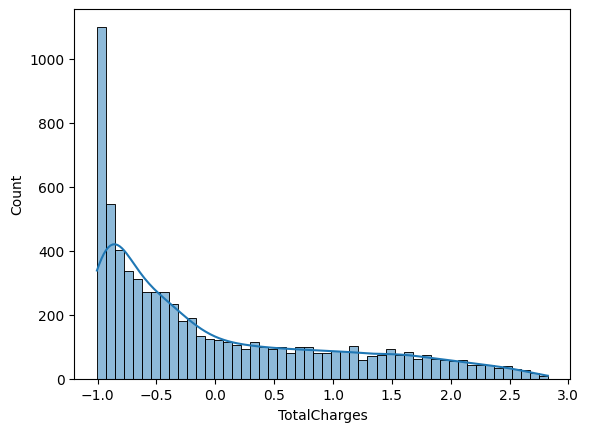

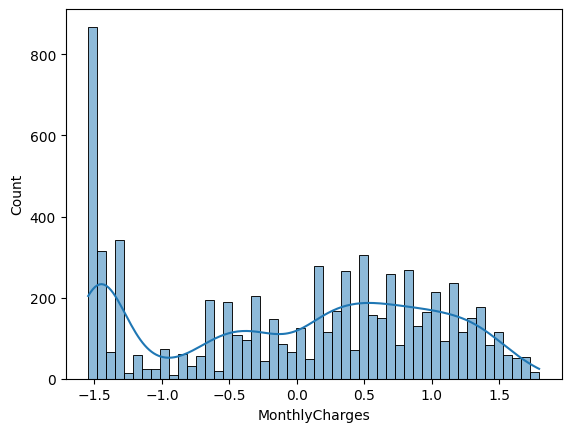

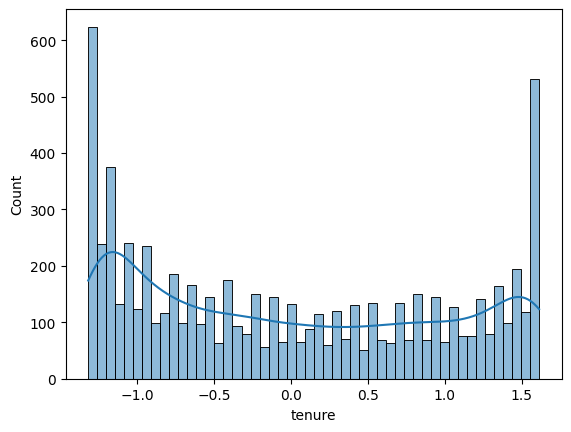

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_values:
  sns.histplot(numerical_values[i], bins=50, kde=True)
  plt.show()

**Visualizing the categorical features**


Total charges is skewed to the right which implies that major of the customers have low total charges with few having very high total charges

Monthly charges on the other hand is left skewed with a few outliers

Tenure is almost symmetrically distributed

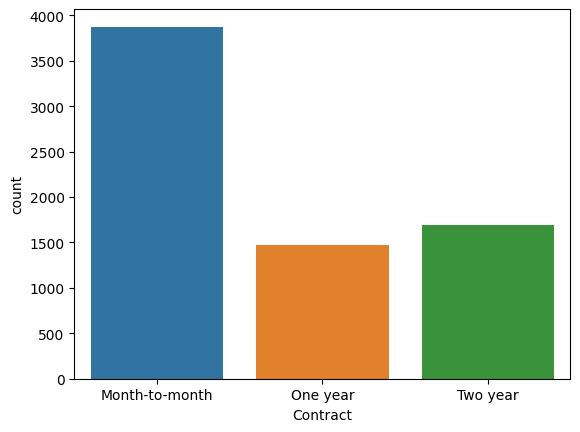

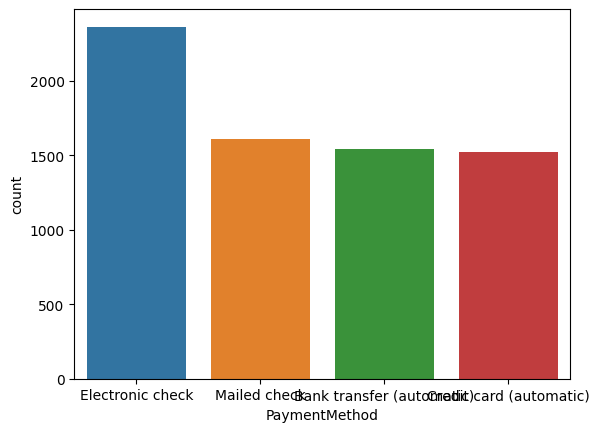

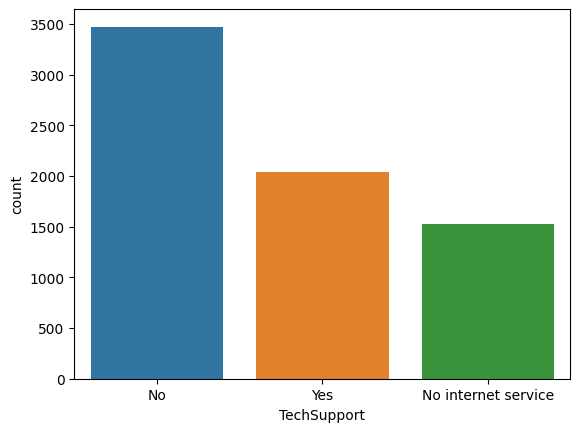

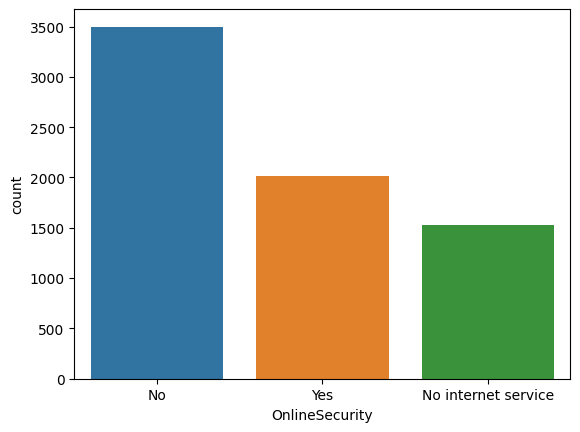

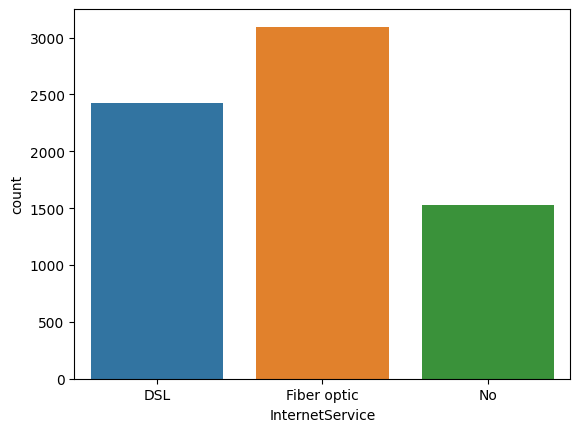

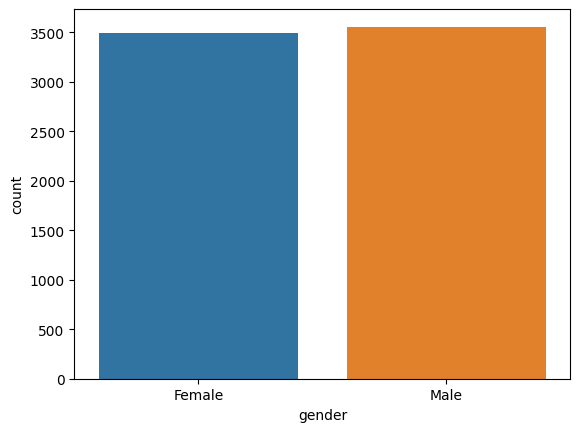

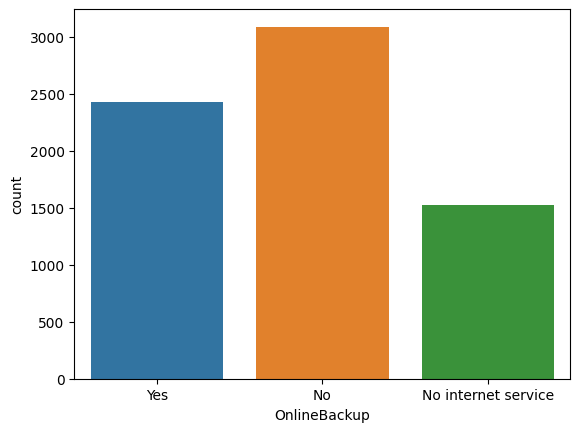

In [35]:
for i in categorical_values:
  sns.countplot(x= i, data=categorical_values)
  plt.show()


1.  From the above graphs it can be seen that more customers opt for the
month-to-month contract than the one and two year contracts
2.  More customers prefer using electronic checks to pay their bills
3. Most customers do not have tech support, online backup and online security
4. Majority of the customers use fibre optic internet followed by dsl with few having no internet service at all
5. There is almost an equal number of males and females






In [36]:
churn2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Visualizing the categorical variables against the dependent variable churn**

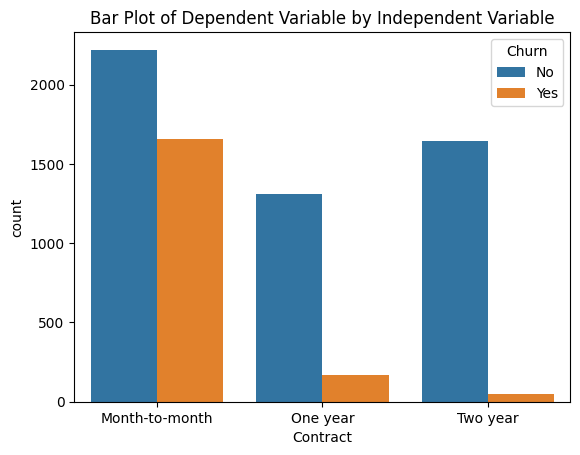

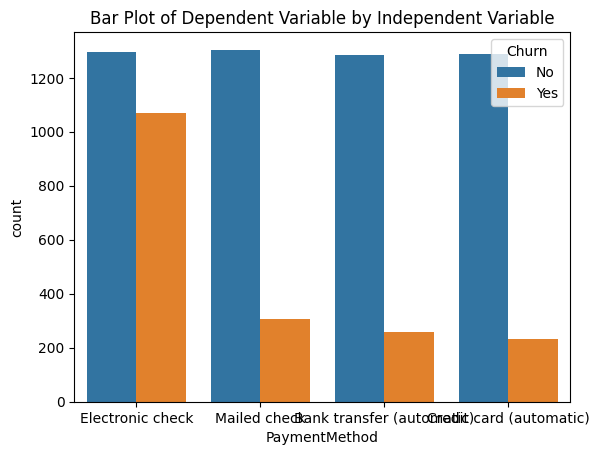

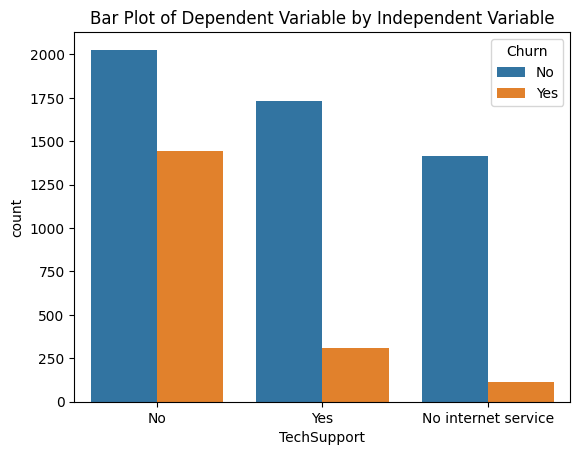

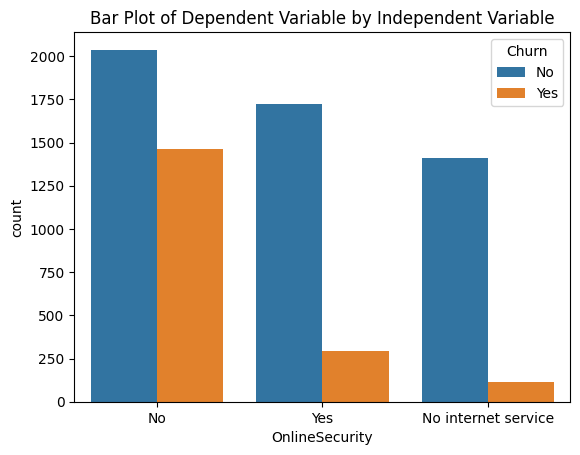

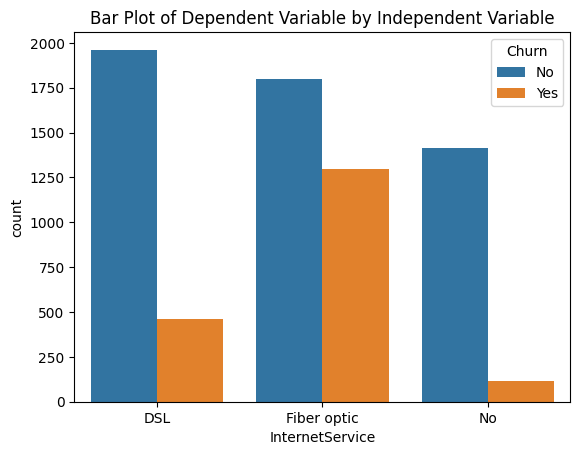

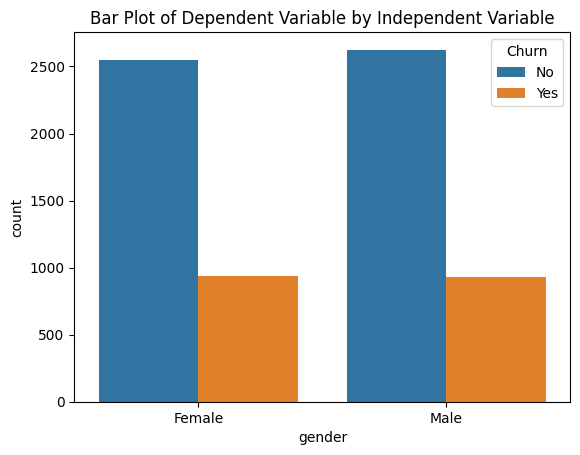

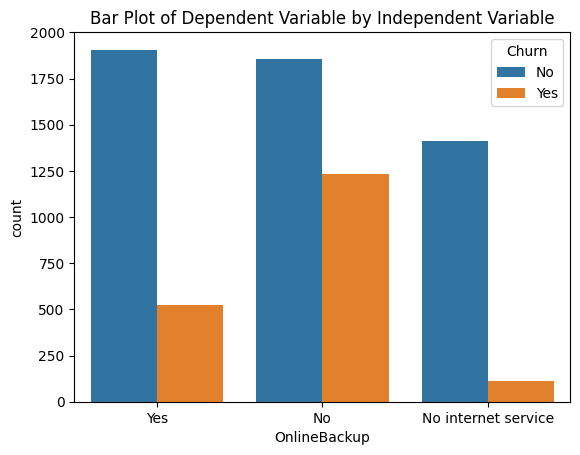

In [37]:
for i in categorical_values:
  sns.countplot(x=i, hue= 'Churn', data=churn2)
  plt.title('Bar Plot of Dependent Variable by Independent Variable')
  plt.show()

People who are using the month to month contract churn more than those using the other contracts and those on the 2 year contract have a lower churn
People using the electronic checks to pay have a higher churn than those who do not
Both females and males have the same level of churning

creating a dataframe that contains churn and the numerical features in order to visualize them

In [38]:
all_numeric =  pd.concat([numerical_values, churn_answer], axis=1)

In [39]:
all_numeric

,TotalCharges,MonthlyCharges,tenure,Churn
0,-0.992611,-1.160323,-1.277445,No
1,-0.172165,-0.259629,0.066327,No
2,-0.958066,-0.362660,-1.236724,Yes
3,-0.193672,-0.746535,0.514251,No
4,-0.938874,0.197365,-1.236724,Yes
...,...,...,...,...
7038,-0.127605,0.665992,-0.340876,No
7039,2.242606,1.277533,1.613701,No
7040,-0.852932,-1.168632,-0.870241,No
7041,-0.870513,0.320338,-1.155283,Yes


Visualizing the relevant numerical variables against churn

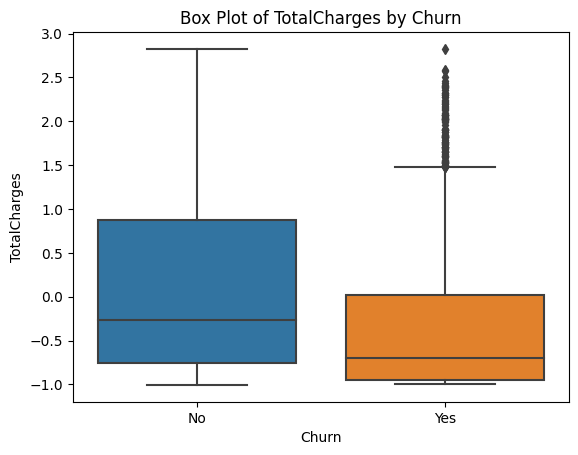

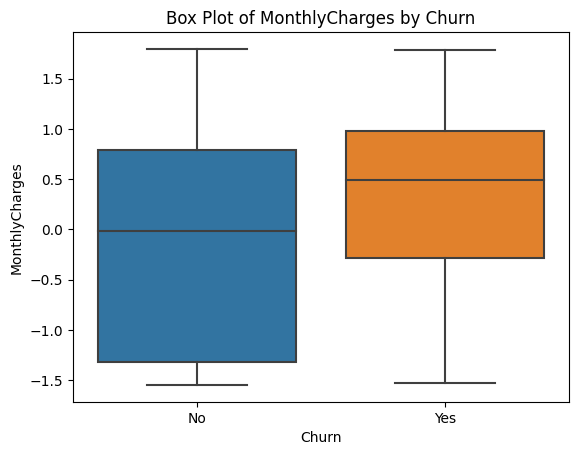

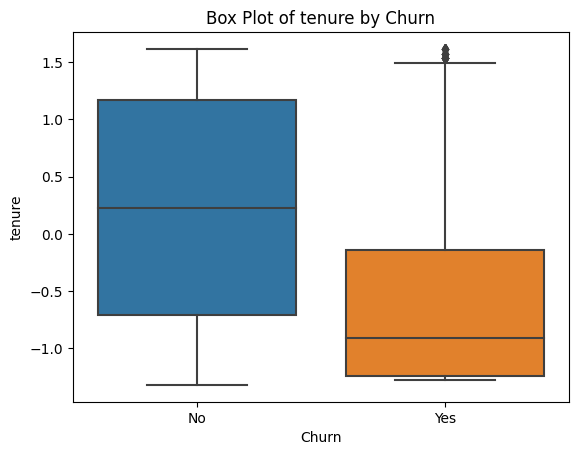

In [40]:
for i in numerical_values:
    sns.boxplot(x='Churn', y = i, data = all_numeric)
    plt.title(f'Box Plot of {i} by Churn')
    plt.show()

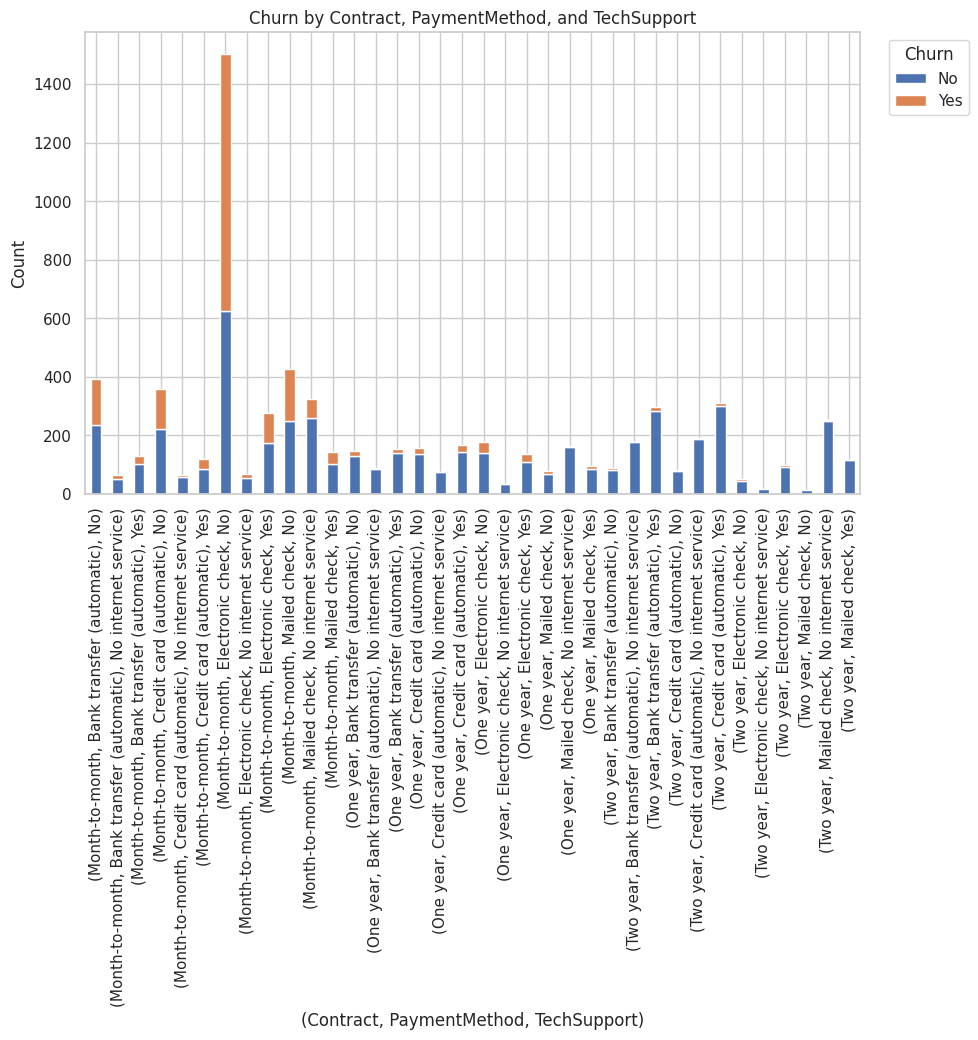

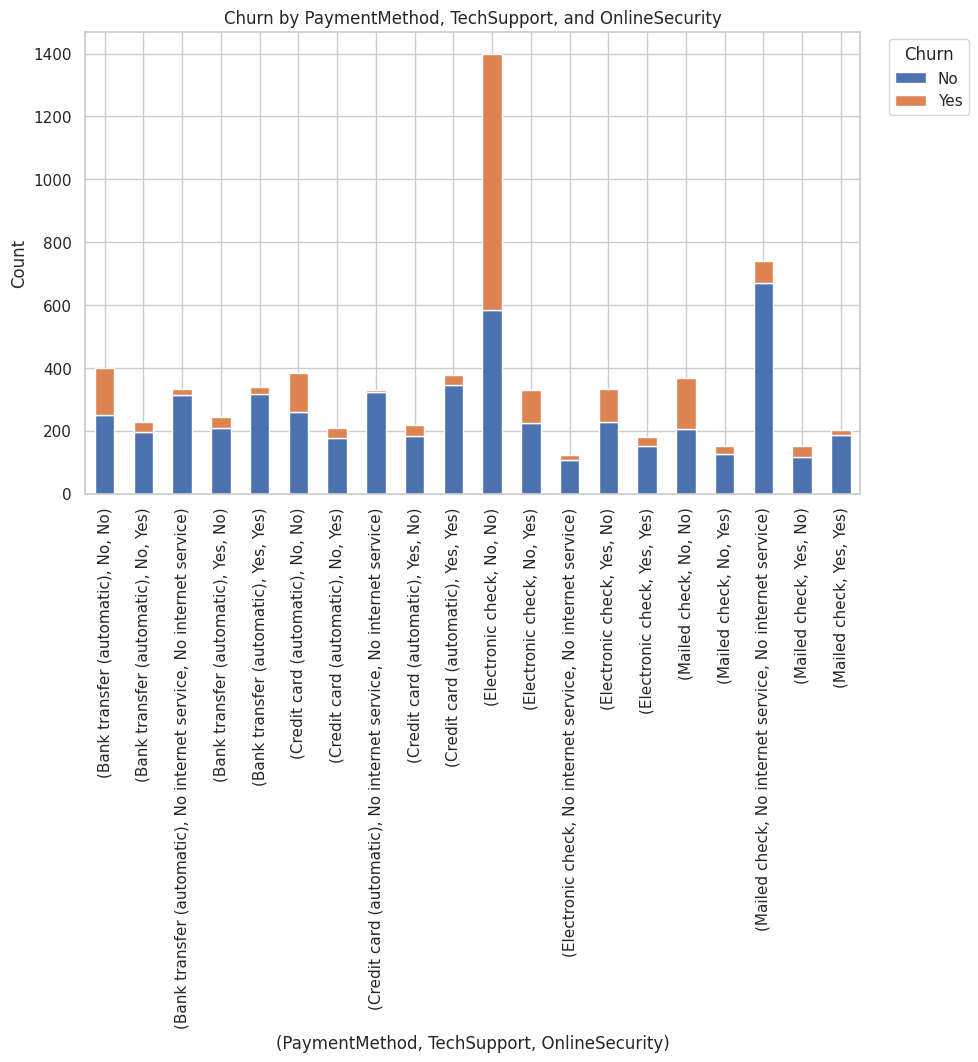

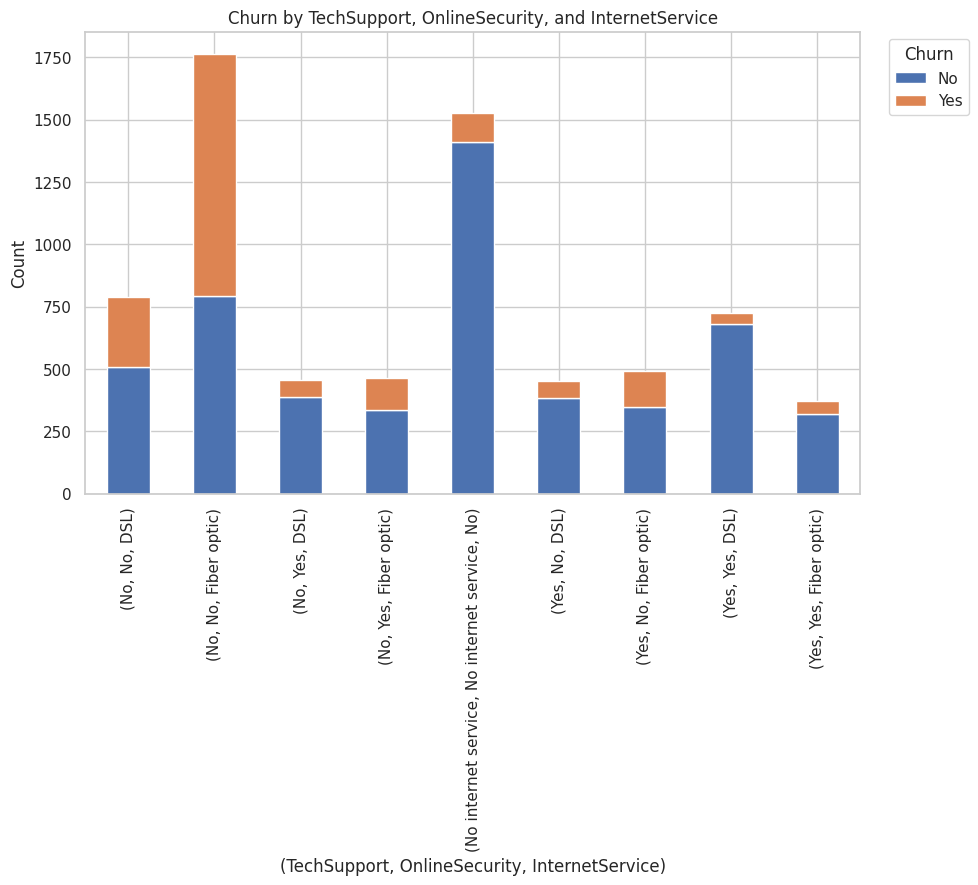

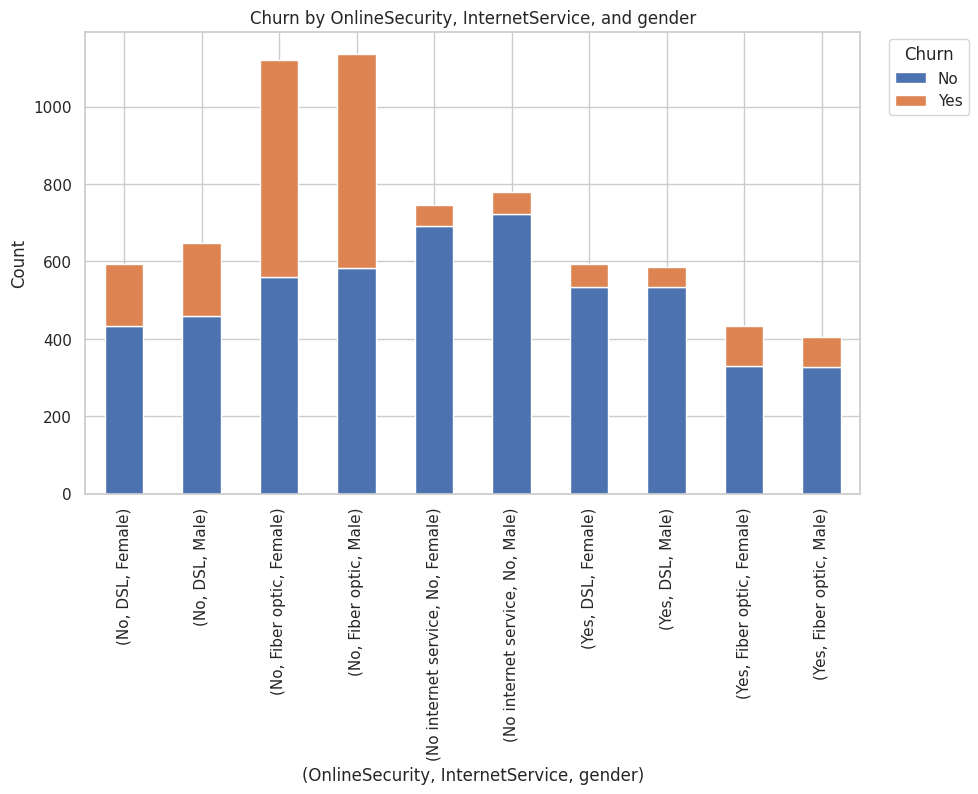

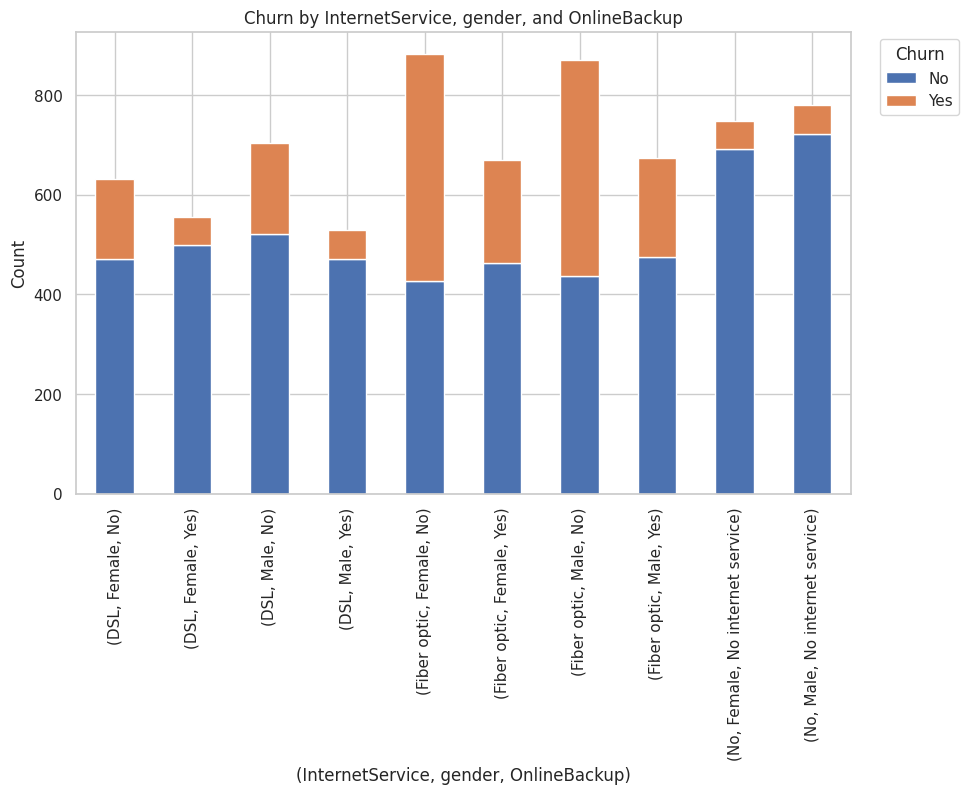

In [73]:
for i in range(len(categorical_values.columns)-2):
    cross_tab = pd.crosstab(index=[categorical_values.iloc[:, i], categorical_values.iloc[:, i+1], categorical_values.iloc[:, i+2]], columns=churn2['Churn'])
    sns.set(style='whitegrid')
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Churn by {categorical_values.columns[i]}, {categorical_values.columns[i+1]}, and {categorical_values.columns[i+2]}')
    plt.xlabel(f'({categorical_values.columns[i]}, {categorical_values.columns[i+1]}, {categorical_values.columns[i+2]})')
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()


It can be seen that people who are are on the month-to-month contract,have no tech_support and pay with electronic checks churn a lot
while the customers who are on the two year contract, pay via credit cards and have no tech support churn the least

People who pay with electronic checks and have no tech support or online security churn a lot while customers have no internet service and pay with mailed checks churn the least

Customers with no tech support or oline security and have dsl churn the most while customers with no internet service, tech support or online security churn the least

Customers who use fibre optic are female and have no online backup churn the most while male customers with no internet service or online backup churn the least

In [41]:
y

,0
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# Training the Keras model with cross validation and grid search

In [42]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(churn, y, test_size = 0.2, random_state=50)

In [43]:
input = Input(shape = (Xtrain.shape[1],))

In [44]:
Xtest.shape

(1409, 10)

In [45]:
Ytest.shape

(1409, 1)

Craeting a function that allows me to create different models

In [46]:
def create_model( optimizer='adam', hidden_units=32 ):
  hidden1 = Dense(hidden_units, activation='relu')(input)
  hidden2 = Dense(32, activation='relu')(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)

  output = Dense(1, activation='sigmoid')(hidden3)
  model = Model(inputs = input, outputs = output)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model


In [47]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1, hidden_units=32)

**Creating a dictionary that holds the relevant parameters and their keys**

In [48]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_units': [32, 64, 128]
}

Using grid search to train the model

In [49]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
118/118 [==============================] - 3s 8ms/step - loss: 0.5472 - accuracy: 0.7146
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4390 - accuracy: 0.7865
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4279 - accuracy: 0.7942
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4229 - accuracy: 0.7929
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7971
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8030
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8032
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4136 - accuracy: 0.8019
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4129 - accuracy: 0.8043
Epoch 10/10
59/59 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
118/118 [==============================] - 2s 3ms/step - loss: 0.5226 - accuracy: 0.7399
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7875
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.7883
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.7915
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.7971
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.7974
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4172 - accuracy: 0.8011
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4151 - accuracy: 0.8022
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4137 - accuracy: 0.8009
Epoch 10/10
59/59 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
118/118 [==============================] - 5s 5ms/step - loss: 0.5021 - accuracy: 0.7569
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.4291 - accuracy: 0.7937
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4245 - accuracy: 0.7979
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.8024
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8054
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.4154 - accuracy: 0.8070
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4140 - accuracy: 0.8064
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4122 - accuracy: 0.8083
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4112 - accuracy: 0.8078
Epoch 10/10
59/59 [==============================] - 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
118/118 [==============================] - 6s 7ms/step - loss: 0.4828 - accuracy: 0.7556
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4344 - accuracy: 0.7942
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4242 - accuracy: 0.7974
Epoch 4/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8024
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8014
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8038
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8086
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8086
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8091
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.5181 - accuracy: 0.7151
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.7846
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7918
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7921
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.7915
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7963
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7974
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7993
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8022
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 3ms/step - loss: 0.4896 - accuracy: 0.7471
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 0.7945
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.7961
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7955
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8030
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8035
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8059
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8080
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8078
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.7404
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8006
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8027
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8035
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8046
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8067
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8126
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8107
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8083
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.7601
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7905
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7937
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7942
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7955
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.7985
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7993
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8001
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.7993
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7670
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7977
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7993
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8009
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8078
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8070
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.8096
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8072
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8115
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7569
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7945
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8006
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8011
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8046
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8067
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8062
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8094
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8104
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7625
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7881
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7886
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7907
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7939
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7990
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.7979
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8040
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.7995
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.7527
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7913
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8011
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7961
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8022
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8070
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8070
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8099
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8131
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7665
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8006
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8017
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8022
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8022
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8040
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8070
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8099
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8094
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7700
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7873
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7902
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7993
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7974
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8017
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8017
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8014
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8035
Epoch 10/10
59/59 [==============================] - 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
118/118 [==============================] - 4s 6ms/step - loss: 0.4649 - accuracy: 0.7772
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.7993
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.4207 - accuracy: 0.8009
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8046
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4142 - accuracy: 0.8027
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4122 - accuracy: 0.8083
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8099
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.4071 - accuracy: 0.8091
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4081 - accuracy: 0.8115
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 4ms/step - loss: 0.4679 - accuracy: 0.7694
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7982
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7995
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.8014
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8022
Epoch 6/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8070
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8091
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4083 - accuracy: 0.8064
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8115
Epoch 10/10
59/59 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.7710
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.7907
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7921
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.7934
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.7966
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7982
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.7977
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.8014
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8059
Epoch 10/10
59/59 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 3ms/step - loss: 0.4929 - accuracy: 0.7497
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7963
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8001
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8054
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8072
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.8043
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.4082 - accuracy: 0.8102
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8107
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8144
Epoch 10/10
59/59 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
177/177 [==============================] - 4s 4ms/step - loss: 0.4545 - accuracy: 0.7787
Epoch 2/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4268 - accuracy: 0.7964
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7978
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8030
Epoch 5/10
177/177 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8026
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8065
Epoch 7/10
177/177 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8069
Epoch 8/10
177/177 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8058
Epoch 9/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8087
Epoch 10/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4073 - accuracy: 0.8074

*Getting the AUC and accuracy scores*

In [50]:
y_pred = grid_result.predict(Xtest)

auc_score = roc_auc_score(Ytest, y_pred)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 2ms/step
AUC Score: 0.7076937935931169


In [51]:
accuracy_scores = cross_val_score(model, Xtest, Ytest, cv=3)
print("Accuracy Scores:", accuracy_scores)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 5s 4ms/step - loss: 0.6049 - accuracy: 0.7114
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7604
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.7923
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.7945
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 0.4373 - accuracy: 0.7955
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.4300 - accuracy: 0.7902
Epoch 7/10
30/30 [==============================] - 0s 11ms/step - loss: 0.4255 - accuracy: 0.7998
Epoch 8/10
30/30 [==============================] - 0s 12ms/step - loss: 0.4204 - accuracy: 0.7966
Epoch 9/10
30/30 [==============================] - 0s 10ms/step - loss: 0.4173 - accuracy: 0.7966
Epoch 10/10
15/15 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
30/30 [==============================] - 2s 2ms/step - loss: 0.5393 - accuracy: 0.7391
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7583
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7934
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4231 - accuracy: 0.8019
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 0.8062
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8104
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4062 - accuracy: 0.8083
Epoch 8/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 0.8136
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8136
Epoch 10/10
15/15 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 1s 3ms/step - loss: 0.6241 - accuracy: 0.7170
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4973 - accuracy: 0.7681
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7936
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8021
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8074
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4128 - accuracy: 0.8085
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8128
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8170
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8160
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Accuracy Scores: [0.81276596 0.7787234  0.78891258]


In [52]:
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")

Mean Accuracy: 0.7934673138864946
Standard Deviation: 0.014266115047500458


*Optimizing the model with new parameters*

In [53]:
model1 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=1, hidden_units=32)

In [54]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_units': [32, 64, 130]
}

In [55]:
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=4)
grid_result1 = grid.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 2ms/step - loss: 0.4905 - accuracy: 0.7458
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7903
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7967
Epoch 4/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.7986
Epoch 5/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.8047
Epoch 6/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.8054
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8038
Epoch 8/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8062
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8076
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4109 - accuracy: 0.8085
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.7631
Epoch 2/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.7889
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.7988
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7976
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8019
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.7967
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8017
Epoch 8/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8031
Epoch 9/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8007
Epoch 10/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8007
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 5ms/step - loss: 0.5018 - accuracy: 0.7489
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4351 - accuracy: 0.7851
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4291 - accuracy: 0.7918
Epoch 4/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4251 - accuracy: 0.7953
Epoch 5/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.7970
Epoch 6/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4227 - accuracy: 0.7972
Epoch 7/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4195 - accuracy: 0.7956
Epoch 8/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4164 - accuracy: 0.8015
Epoch 9/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4161 - accuracy: 0.8010
Epoch 10/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4139 - accuracy: 0.8060
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.7499
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7974
Epoch 3/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7986
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7977
Epoch 5/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.7993
Epoch 6/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8038
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8008
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8031
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8074
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8093
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7486
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7931
Epoch 3/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7936
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7998
Epoch 5/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8012
Epoch 6/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8002
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8054
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8073
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8054
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8062
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.5207 - accuracy: 0.7271
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7879
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7995
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.7976
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7995
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8014
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8047
Epoch 8/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8026
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8050
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8085
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4974 - accuracy: 0.7549
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7932
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.8015
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8019
Epoch 5/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.8031
Epoch 6/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4163 - accuracy: 0.8055
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8050
Epoch 8/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8081
Epoch 9/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4129 - accuracy: 0.8071
Epoch 10/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4100 - accuracy: 0.8069
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.7508
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7929
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7979
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.7993
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8017
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.7998
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8022
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8027
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8060
Epoch 10/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8074
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
133/133 [==============================] - 4s 4ms/step - loss: 0.5041 - accuracy: 0.7382
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7957
Epoch 3/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7993
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8009
Epoch 5/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8043
Epoch 6/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8064
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8043
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8111
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8137
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8071

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 4ms/step - loss: 0.4816 - accuracy: 0.7588
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4273 - accuracy: 0.7908
Epoch 3/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.7962
Epoch 4/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.7986
Epoch 5/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4172 - accuracy: 0.7972
Epoch 6/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8033
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8017
Epoch 8/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.8052
Epoch 9/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8045
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8066
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4941 - accuracy: 0.7447
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7906
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7946
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7944
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7998
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.7974
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8003
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8050
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8027
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8105
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7681
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7932
Epoch 3/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7974
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8045
Epoch 5/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8022
Epoch 6/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8034
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8022
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8034
Epoch 9/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8053
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4046 - accuracy: 0.8076
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
133/133 [==============================] - 2s 2ms/step - loss: 0.4716 - accuracy: 0.7716
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7950
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8000
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8031
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8028
Epoch 6/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8062
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4115 - accuracy: 0.8064
Epoch 8/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4115 - accuracy: 0.8125
Epoch 9/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8095
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8038

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 3s 5ms/step - loss: 0.4716 - accuracy: 0.7718
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4284 - accuracy: 0.7964
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4233 - accuracy: 0.7946
Epoch 4/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4188 - accuracy: 0.7969
Epoch 5/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4161 - accuracy: 0.8002
Epoch 6/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8019
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8033
Epoch 8/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4108 - accuracy: 0.8057
Epoch 9/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4078 - accuracy: 0.8066
Epoch 10/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4061 - accuracy: 0.8064
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 4ms/step - loss: 0.4907 - accuracy: 0.7496
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.7903
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.7993
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7986
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8012
Epoch 6/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8000
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8064
Epoch 8/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8074
Epoch 9/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4175 - accuracy: 0.8012
Epoch 10/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4107 - accuracy: 0.8100
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7641
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7970
Epoch 3/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.7977
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8000
Epoch 5/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8043
Epoch 6/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8074
Epoch 7/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8057
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8088
Epoch 9/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8112
Epoch 10/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8069
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7621
Epoch 2/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7924
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8012
Epoch 4/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.8047
Epoch 5/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4175 - accuracy: 0.8014
Epoch 6/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4169 - accuracy: 0.8080
Epoch 7/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4172 - accuracy: 0.8043
Epoch 8/20
133/133 [==============================] - 1s 6ms/step - loss: 0.4129 - accuracy: 0.8066
Epoch 9/20
133/133 [==============================] - 1s 7ms/step - loss: 0.4160 - accuracy: 0.8028
Epoch 10/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4102 - accuracy: 0.8090
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7695
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7950
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.7957
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.7983
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.7998
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8040
Epoch 7/20
133/133 [==============================] - 1s 7ms/step - loss: 0.4101 - accuracy: 0.8045
Epoch 8/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.7991
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8057
Epoch 10/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8050
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.7778
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7922
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.7951
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.7982
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7996
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.7998
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8027
Epoch 8/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8088
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8048
Epoch 10/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8041
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
133/133 [==============================] - 2s 4ms/step - loss: 0.4704 - accuracy: 0.7629
Epoch 2/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4256 - accuracy: 0.7986
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.7984
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8027
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8036
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8062
Epoch 7/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8086
Epoch 8/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8069
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8079
Epoch 10/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8140

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 5ms/step - loss: 0.4792 - accuracy: 0.7683
Epoch 2/20
133/133 [==============================] - 1s 7ms/step - loss: 0.4294 - accuracy: 0.7955
Epoch 3/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.7991
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8036
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8085
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8090
Epoch 7/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8069
Epoch 8/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8085
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8085
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4063 - accuracy: 0.8118
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.7612
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7936
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7979
Epoch 4/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7964
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8021
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8002
Epoch 7/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4109 - accuracy: 0.8054
Epoch 8/20
133/133 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8078
Epoch 9/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8059
Epoch 10/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8071
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4598 - accuracy: 0.7735
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7922
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.7939
Epoch 4/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4202 - accuracy: 0.7993
Epoch 5/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4206 - accuracy: 0.8015
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8010
Epoch 7/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8043
Epoch 8/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.7989
Epoch 9/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4137 - accuracy: 0.8062
Epoch 10/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4118 - accuracy: 0.8067
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 4ms/step - loss: 0.4740 - accuracy: 0.7754
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7989
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8048
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.7979
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8034
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8034
Epoch 7/20
133/133 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.8050
Epoch 8/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4065 - accuracy: 0.8093
Epoch 9/20
133/133 [==============================] - 1s 5ms/step - loss: 0.4066 - accuracy: 0.8069
Epoch 10/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4042 - accuracy: 0.8095
Epoch 11/2

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7739
Epoch 2/20
177/177 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.7929
Epoch 3/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.7973
Epoch 4/20
177/177 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.7973
Epoch 5/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.8009
Epoch 6/20
177/177 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8024
Epoch 7/20
177/177 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8024
Epoch 8/20
177/177 [==============================] - 1s 7ms/step - loss: 0.4131 - accuracy: 0.8023
Epoch 9/20
177/177 [==============================] - 1s 4ms/step - loss: 0.4131 - accuracy: 0.8044
Epoch 10/20
177/177 [==============================] - 1s 8ms/step - loss: 0.4112 - accuracy: 0.8069
Epoch 11/2

In [56]:
y_pred = grid_result1.predict(Xtest)

auc_score = roc_auc_score(Ytest, y_pred)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 3ms/step
AUC Score: 0.7025056905985049


In [57]:
accuracy_scores = cross_val_score(model1, Xtest, Ytest, cv=3)
print("Accuracy Scores:", accuracy_scores)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
30/30 [==============================] - 2s 2ms/step - loss: 0.6082 - accuracy: 0.6869
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7710
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7913
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7966
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7998
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7998
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8040
Epoch 8/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8051
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7966
Epoch 10/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8051
Epoch 11/20
30/30 [

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 1s 3ms/step - loss: 0.6362 - accuracy: 0.6145
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7487
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.7827
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8051
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8030
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8009
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8019
Epoch 8/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4053 - accuracy: 0.8083
Epoch 9/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4028 - accuracy: 0.8062
Epoch 10/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4011 - accuracy: 0.8115
Epoch 11/20
30/30 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
30/30 [==============================] - 1s 2ms/step - loss: 0.6337 - accuracy: 0.6702
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7383
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7787
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8011
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8096
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8064
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8149
Epoch 8/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8138
Epoch 9/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8106
Epoch 10/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8181
Epoch 11/20
30/30 [

In [58]:
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")

Mean Accuracy: 0.7934567285154773
Standard Deviation: 0.014011478878534631


In [59]:
model2 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1, hidden_units=32)

In [60]:
param_grid = {
    'optimizer': ['rmsprop', 'adadelta'],
    'hidden_units': [40, 80, 120]
}

In [61]:
grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=4)
grid_result2 = grid.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7676
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7941
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7979
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8026
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8069
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8050
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8090
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8069
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8073
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8054
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.7678
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7889
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7950
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.7943
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8007
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8000
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8043
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8031
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8040
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8043
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7508
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7903
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7901
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7970
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7972
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7996
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7991
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8027
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8048
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8097
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4725 - accuracy: 0.7664
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7948
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7967
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.7979
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7982
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8057
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8053
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8086
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8071
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8131
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4850 - accuracy: 0.7704
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.7955
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8024
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8024
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8052
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8002
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8050
Epoch 8/50
133/133 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8083
Epoch 9/50
133/133 [==============================] - 1s 7ms/step - loss: 0.4147 - accuracy: 0.8019
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8059
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.5046 - accuracy: 0.7524
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7938
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.7941
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.7983
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.7991
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7998
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8052
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8036
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8031
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8092
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.5090 - accuracy: 0.7354
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7918
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7932
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7967
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7948
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7965
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7996
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.7977
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8041
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8027
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7672
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7982
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8000
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8055
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8036
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8069
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8057
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8086
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8055
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8114
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.7595
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7995
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7969
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8045
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8036
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8043
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8128
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8059
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8076
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8097
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.7669
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7924
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.7969
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8026
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8000
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7986
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8033
Epoch 8/50
133/133 [==============================] - 1s 8ms/step - loss: 0.4111 - accuracy: 0.8071
Epoch 9/50
133/133 [==============================] - 1s 8ms/step - loss: 0.4072 - accuracy: 0.8024
Epoch 10/50
133/133 [==============================] - 1s 6ms/step - loss: 0.4064 - accuracy: 0.8080
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4757 - accuracy: 0.7563
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.7953
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.7946
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.7963
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.7989
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8015
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8055
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.7993
Epoch 9/50
133/133 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8093
Epoch 10/50
133/133 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8088
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7662
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7958
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8041
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8041
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8012
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8043
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8086
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8105
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8114
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8055
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7770
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7964
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8012
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8064
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8017
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8066
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8071
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8062
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8078
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8069
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4832 - accuracy: 0.7524
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7903
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.7931
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7931
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.7955
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8026
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8064
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8050
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8052
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8031
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4860 - accuracy: 0.7539
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.7908
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.7960
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8008
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8000
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8008
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8022
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.7996
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8022
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8062
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.7489
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7963
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7993
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8019
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8031
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8064
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8071
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8067
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8074
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8135
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.7740
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7943
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8031
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8036
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8028
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8083
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8078
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8088
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8107
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8062
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7633
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7931
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7969
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8012
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8014
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8005
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8045
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8054
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8080
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8109
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4854 - accuracy: 0.7546
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7946
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7970
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8019
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7998
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8029
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8038
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8057
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8048
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8055
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4752 - accuracy: 0.7646
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7970
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8017
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8019
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8012
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8069
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8041
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8069
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8086
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8138
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4549 - accuracy: 0.7808
Epoch 2/50
133/133 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.8005
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8040
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8040
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8076
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8059
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8045
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8085
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8097
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8099
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4731 - accuracy: 0.7659
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7927
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.7972
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7998
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8014
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8024
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8052
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8064
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8043
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8073
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7705
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7972
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7948
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7932
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8003
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8022
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8057
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8057
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8079
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8081
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.7719
Epoch 2/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8005
Epoch 3/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8029
Epoch 4/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8017
Epoch 5/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8043
Epoch 6/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8050
Epoch 7/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8076
Epoch 8/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8131
Epoch 9/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8045
Epoch 10/50
133/133 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8074
Epoch 11/5

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7838
Epoch 2/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7964
Epoch 3/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7968
Epoch 4/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8039
Epoch 5/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8019
Epoch 6/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8076
Epoch 7/50
177/177 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8078
Epoch 8/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8072
Epoch 9/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8062
Epoch 10/50
177/177 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8095
Epoch 11/5

In [62]:
y_pred = grid_result2.predict(Xtest)

auc_score = roc_auc_score(Ytest, y_pred)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 1ms/step
AUC Score: 0.7009133671636804


In [63]:
accuracy_scores = cross_val_score(model2, Xtest, Ytest, cv=3)
print("Accuracy Scores:", accuracy_scores)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7391
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7423
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7764
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7977
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7966
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7923
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7966
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8062
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8062
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8072
Epoch 11/50
30/30 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7391
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7625
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7966
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8019
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8051
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8083
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8115
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8019
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8126
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8136
Epoch 11/50
30/30 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 3s 3ms/step - loss: 0.6273 - accuracy: 0.6585
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7383
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.7500
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8011
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8128
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.8085
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8106
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8106
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8106
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8106
Epoch 11/50
30/30 [===========

In [64]:
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")

Mean Accuracy: 0.7806907710686688
Standard Deviation: 0.010665930869128967


**Saving the nodel with the highest accuracy**

In [65]:
model3 = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1, hidden_units=32)
model = create_model('adadelta',160)
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
param_grid = {
    'optimizer': ['adam', 'adadelta'],
    'hidden_units': [64, 64, 160]
}

In [67]:
grid = GridSearchCV(estimator=model3, param_grid=param_grid, cv=4)
grid_result3 = grid.fit(Xtrain, Ytrain)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4907 - accuracy: 0.7567
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7979
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8019
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8002
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8012
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8012
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8050
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8064
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8104
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.7593
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7917
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7983
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.7969
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8050
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8005
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8014
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8036
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8071
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 2ms/step - loss: 0.4625 - accuracy: 0.7695
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7967
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7939
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7965
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7972
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7977
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7998
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8043
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8015
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7799
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7960
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8031
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8012
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8090
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8057
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8112
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8090
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8107
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4863 - accuracy: 0.7645
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7967
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.7983
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8033
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8047
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8052
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8064
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8085
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8099
Epoch 10/10
45/45 [==============================] - 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.7825
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7946
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7995
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.7998
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.7969
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8024
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8026
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8045
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8069
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.7572
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7960
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7967
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7979
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8017
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.7986
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8062
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8036
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8062
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4871 - accuracy: 0.7565
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.7960
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.7989
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8005
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4147 - accuracy: 0.8060
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8090
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8079
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8093
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8071
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7292
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7967
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8014
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7981
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8026
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8014
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8090
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8047
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8036
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 3s 11ms/step - loss: 0.4643 - accuracy: 0.7664
Epoch 2/10
133/133 [==============================] - 2s 17ms/step - loss: 0.4278 - accuracy: 0.7946
Epoch 3/10
133/133 [==============================] - 1s 8ms/step - loss: 0.4211 - accuracy: 0.7948
Epoch 4/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4158 - accuracy: 0.8028
Epoch 5/10
133/133 [==============================] - 1s 9ms/step - loss: 0.4155 - accuracy: 0.7962
Epoch 6/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4124 - accuracy: 0.8031
Epoch 7/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4120 - accuracy: 0.8062
Epoch 8/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8064
Epoch 9/10
133/133 [==============================] - 1s 8ms/step - loss: 0.4078 - accuracy: 0.8066
Epoch 10/10
45/45 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
133/133 [==============================] - 2s 4ms/step - loss: 0.4680 - accuracy: 0.7648
Epoch 2/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4307 - accuracy: 0.7913
Epoch 3/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4261 - accuracy: 0.7911
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4210 - accuracy: 0.7993
Epoch 5/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.7972
Epoch 6/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8024
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8008
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8017
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8036
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4550 - accuracy: 0.7780
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7989
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8019
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8024
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8024
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8041
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8053
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8041
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8112
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 4ms/step - loss: 0.4805 - accuracy: 0.7702
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7931
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7946
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8017
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8033
Epoch 6/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4166 - accuracy: 0.8033
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8036
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8052
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8071
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 3s 4ms/step - loss: 0.4725 - accuracy: 0.7695
Epoch 2/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4288 - accuracy: 0.7903
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.7955
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.7974
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8002
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.7979
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8026
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8045
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8038
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 3ms/step - loss: 0.4859 - accuracy: 0.7619
Epoch 2/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4317 - accuracy: 0.7880
Epoch 3/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4254 - accuracy: 0.7958
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.7974
Epoch 5/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.7965
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.7993
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8029
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8027
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8055
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7532
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7977
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7977
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8015
Epoch 5/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8015
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8024
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8034
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8043
Epoch 9/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8086
Epoch 10/10
44/44 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
133/133 [==============================] - 2s 4ms/step - loss: 0.4579 - accuracy: 0.7695
Epoch 2/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.8005
Epoch 3/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.7972
Epoch 4/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8043
Epoch 5/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8017
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8111
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8090
Epoch 8/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8097
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8095
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.7714
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7891
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7924
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7962
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8043
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8007
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8024
Epoch 8/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4107 - accuracy: 0.7993
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8057
Epoch 10/10
45/45 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 4ms/step - loss: 0.4571 - accuracy: 0.7823
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7941
Epoch 3/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.7958
Epoch 4/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4182 - accuracy: 0.7991
Epoch 5/10
133/133 [==============================] - 1s 8ms/step - loss: 0.4171 - accuracy: 0.8005
Epoch 6/10
133/133 [==============================] - 1s 8ms/step - loss: 0.4158 - accuracy: 0.7993
Epoch 7/10
133/133 [==============================] - 1s 8ms/step - loss: 0.4138 - accuracy: 0.8069
Epoch 8/10
133/133 [==============================] - 1s 9ms/step - loss: 0.4130 - accuracy: 0.8043
Epoch 9/10
133/133 [==============================] - 1s 10ms/step - loss: 0.4139 - accuracy: 0.8053
Epoch 10/10
44/44 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
133/133 [==============================] - 2s 4ms/step - loss: 0.4613 - accuracy: 0.7830
Epoch 2/10
133/133 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.7920
Epoch 3/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4181 - accuracy: 0.8003
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.8022
Epoch 5/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4132 - accuracy: 0.8017
Epoch 6/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4115 - accuracy: 0.8015
Epoch 7/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4087 - accuracy: 0.8064
Epoch 8/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4095 - accuracy: 0.8045
Epoch 9/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4052 - accuracy: 0.8095
Epoch 10/10
44/44 [==============================] - 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
133/133 [==============================] - 4s 6ms/step - loss: 0.4673 - accuracy: 0.7704
Epoch 2/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.7974
Epoch 3/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4220 - accuracy: 0.8028
Epoch 4/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8038
Epoch 5/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4150 - accuracy: 0.8045
Epoch 6/10
133/133 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8092
Epoch 7/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4108 - accuracy: 0.8066
Epoch 8/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4113 - accuracy: 0.8047
Epoch 9/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8066
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 3s 6ms/step - loss: 0.4781 - accuracy: 0.7593
Epoch 2/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.7931
Epoch 3/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4194 - accuracy: 0.7981
Epoch 4/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4158 - accuracy: 0.8002
Epoch 5/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4132 - accuracy: 0.8062
Epoch 6/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4119 - accuracy: 0.8099
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8064
Epoch 8/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8057
Epoch 9/10
133/133 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8080
Epoch 10/10
45/45 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7719
Epoch 2/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7894
Epoch 3/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.7944
Epoch 4/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7953
Epoch 5/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.7998
Epoch 6/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8036
Epoch 7/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8008
Epoch 8/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8003
Epoch 9/10
133/133 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8071
Epoch 10/10
44/44 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


133/133 [==============================] - 2s 6ms/step - loss: 0.4538 - accuracy: 0.7830
Epoch 2/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4237 - accuracy: 0.8003
Epoch 3/10
133/133 [==============================] - 1s 7ms/step - loss: 0.4183 - accuracy: 0.8031
Epoch 4/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.8053
Epoch 5/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4113 - accuracy: 0.8097
Epoch 6/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4105 - accuracy: 0.8083
Epoch 7/10
133/133 [==============================] - 1s 5ms/step - loss: 0.4072 - accuracy: 0.8105
Epoch 8/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8112
Epoch 9/10
133/133 [==============================] - 1s 6ms/step - loss: 0.4040 - accuracy: 0.8128
Epoch 10/10
44/44 [==============================] - 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
177/177 [==============================] - 3s 4ms/step - loss: 0.4709 - accuracy: 0.7710
Epoch 2/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.7927
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.7934
Epoch 4/10
177/177 [==============================] - 1s 7ms/step - loss: 0.4183 - accuracy: 0.7977
Epoch 5/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4168 - accuracy: 0.8026
Epoch 6/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8014
Epoch 7/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8003
Epoch 8/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8071
Epoch 9/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8049
Epoch 10/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8065

In [68]:
y_pred = grid_result3.predict(Xtest)

auc_score = roc_auc_score(Ytest, y_pred)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 3ms/step
AUC Score: 0.7114670780603934


In [69]:
accuracy_scores = cross_val_score(model3, Xtest, Ytest, cv=3)
print("Accuracy Scores:", accuracy_scores)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 2s 4ms/step - loss: 0.6444 - accuracy: 0.6028
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7391
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.7753
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7827
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7859
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7838
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.7987
Epoch 8/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4196 - accuracy: 0.7987
Epoch 9/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4153 - accuracy: 0.8019
Epoch 10/10
15/15 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
30/30 [==============================] - 4s 4ms/step - loss: 0.5983 - accuracy: 0.6944
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7806
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7934
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8083
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8030
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.8030
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8030
Epoch 8/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8030
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8094
Epoch 10/10
15/15 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


30/30 [==============================] - 2s 4ms/step - loss: 0.6316 - accuracy: 0.6351
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7660
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8021
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.8064
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4216 - accuracy: 0.8043
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8128
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8064
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8138
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8117
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Accuracy Scores: [0.80638298 0.78723404 0.78678038]


In [70]:
print(f"Mean Accuracy: {accuracy_scores.mean()}")
print(f"Standard Deviation: {accuracy_scores.std()}")

Mean Accuracy: 0.793465801690635
Standard Deviation: 0.009135700974348845
